In [14]:
import sys
import os

# If your notebook is in the same directory as the 'data_collector' module, you can use:
# root_path = os.getcwd()

# If you need to go up one directory from the notebook's location, you can use:
root_path = os.path.dirname(os.getcwd())

sys.path.append(root_path)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from data_collection.data_collector import DataCollector


In [15]:
dc = DataCollector('epl')
df = dc.collect_data(year_start=2003, year_end=2023, write_csv=False)
# sample output



Fetching data: 100%|█████████████████████████████████████████████████████████████████████████| 21/21 [00:04<00:00,  4.27it/s]
/Users/admin/git_projects/football/data_collection/data_collector.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Date=lambda x: pd.to_datetime(x['Date'], dayfirst=True),


# Summary Metrics by Team

In [17]:
teams_stats = dc.compute_team_statistics(df, 2003, 2023)
teams_stats.sort_values('WinRatio', ascending=False)


,HomeTeam,HomeGames,HomeWins,HomeDraws,HomeGoals,AwayGames,AwayWins,AwayDraws,AwayGoals,TotalGames,TotalWins,TotalDraws,TotalGoals,WinRatio,DrawRatio,HomeWinRatio,AwayWinRatio,HomeGoalRatio,AwayGoalRatio,TotalGoalRatio
24,Man United,386,266,70,787.0,385,195,92,600.0,771,461,162,1387.0,0.597925,0.210117,0.689119,0.506494,2.038860,1.558442,1.798962
12,Chelsea,385,245,92,776.0,385,207,76,618.0,770,452,168,1394.0,0.587013,0.218182,0.636364,0.537662,2.015584,1.605195,1.810390
23,Man City,384,260,62,869.0,386,182,82,644.0,770,442,144,1513.0,0.574026,0.187013,0.677083,0.471503,2.263021,1.668394,1.964935
0,Arsenal,384,254,82,811.0,386,177,92,622.0,770,431,174,1433.0,0.559740,0.225974,0.661458,0.458549,2.111979,1.611399,1.861039
21,Liverpool,383,251,90,803.0,387,180,95,617.0,770,431,185,1420.0,0.559740,0.240260,0.655352,0.465116,2.096606,1.594315,1.844156
37,Tottenham,386,233,72,716.0,385,147,100,563.0,771,380,172,1279.0,0.492866,0.223087,0.603627,0.381818,1.854922,1.462338,1.658885
15,Everton,387,189,90,594.0,384,107,122,418.0,771,296,212,1012.0,0.383917,0.274968,0.488372,0.278646,1.534884,1.088542,1.312581
20,Leicester,189,82,47,288.0,186,58,45,274.0,375,140,92,562.0,0.373333,0.245333,0.433862,0.311828,1.523810,1.473118,1.498667
7,Brentford,48,20,13,74.0,47,13,12,58.0,95,33,25,132.0,0.347368,0.263158,0.416667,0.276596,1.541667,1.234043,1.389474
40,West Ham,332,140,77,486.0,333,84,82,362.0,665,224,159,848.0,0.336842,0.239098,0.421687,0.252252,1.463855,1.087087,1.275188


## Distributions

In [5]:
df.head()

,game_id,Div,Date,HomeTeam,TG,AwayTeam,FTHG,FTAG,FTR,HTHG,...,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season,city_name,lat,lon
0,b1d1dde1,serie_a,2003-08-30,Reggina,4.0,Sampdoria,2.0,2.0,D,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003/2004,Reggio Calabria,38.103539,15.639756
1,a4518975,serie_a,2003-08-31,Bologna,4.0,Parma,2.0,2.0,D,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003/2004,Bologna,44.493820,11.342633
2,eb3e5bfc,serie_a,2003-08-31,Brescia,2.0,Chievo,1.0,1.0,D,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003/2004,Brescia,45.779580,10.425873
3,86fb3365,serie_a,2003-08-31,Inter,2.0,Modena,2.0,0.0,H,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003/2004,Milano,45.464194,9.189635
4,dc14e91b,serie_a,2003-08-31,Juventus,6.0,Empoli,5.0,1.0,H,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003/2004,Torino,45.067755,7.682489


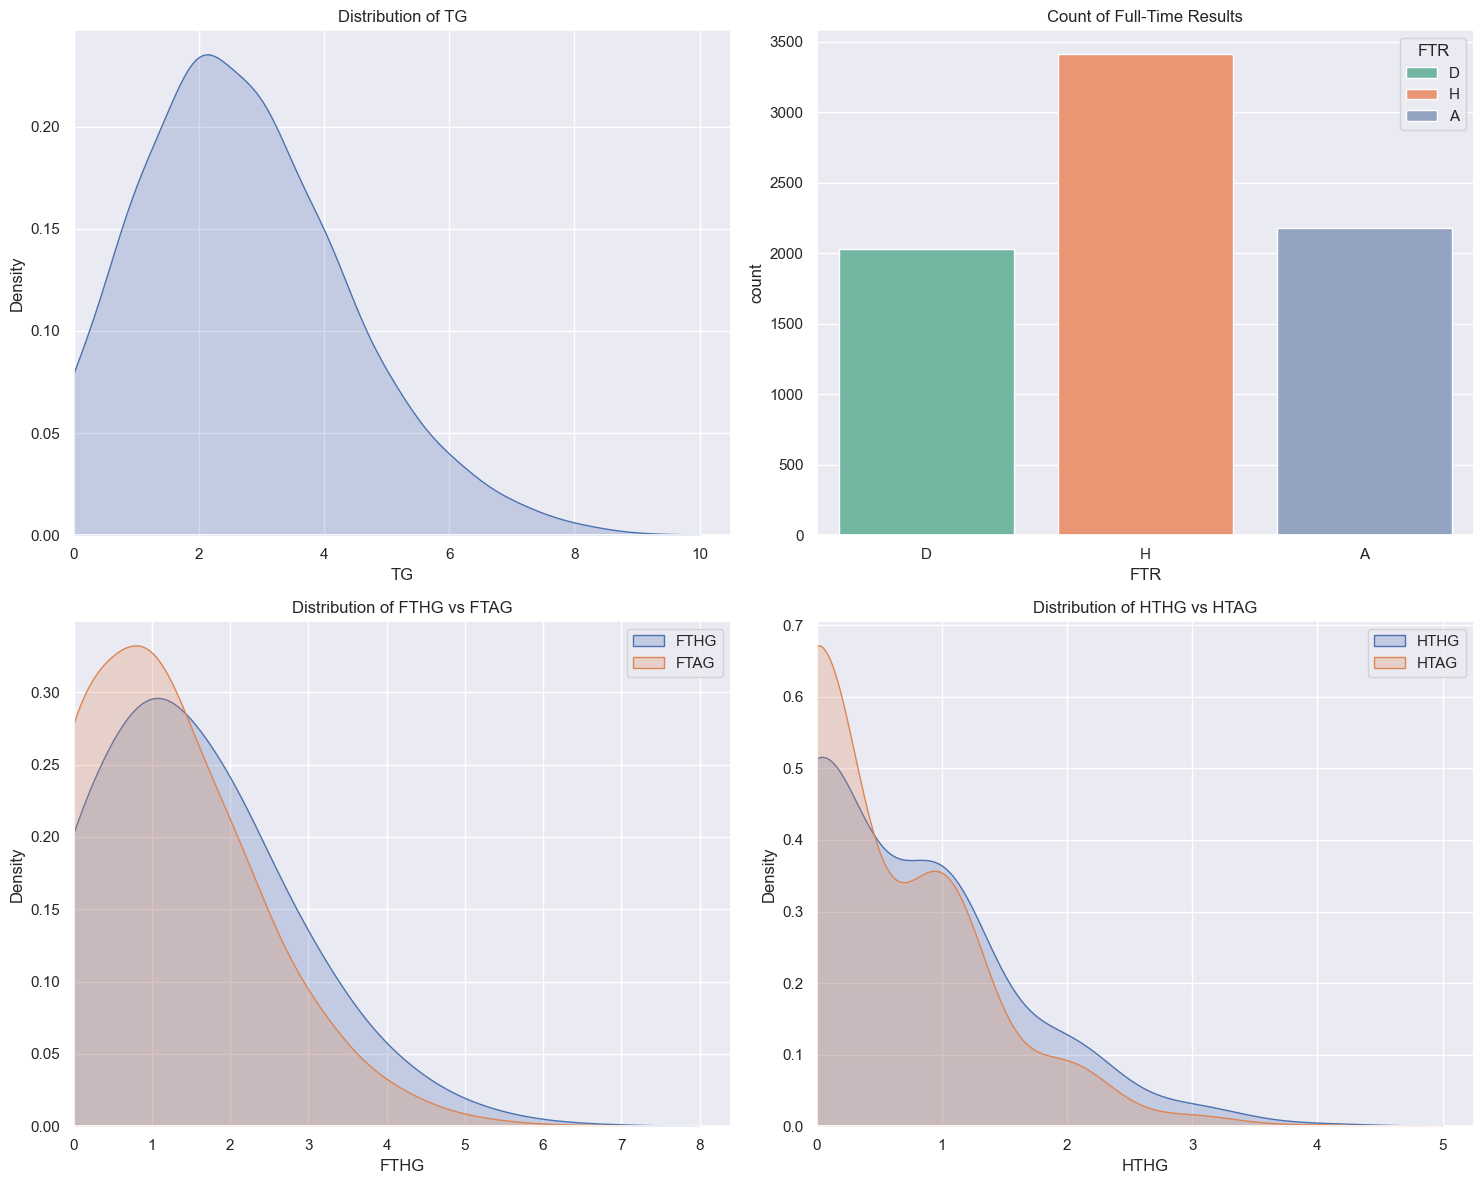

In [6]:
sns.set_theme()

f, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjusted figsize for better visibility

# KDE plot for 'TG'
sns.kdeplot(data=df, x='TG', cut=0, bw_adjust=2, ax=axes[0, 0], fill=True)
axes[0, 0].set_xlim(left=0)
axes[0, 0].set_title('Distribution of TG')

# Count plot for 'FTR'
sns.countplot(data=df, x='FTR', hue='FTR', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Count of Full-Time Results')


sns.kdeplot(data=df, x='FTHG', ax=axes[1, 0], cut=0, bw_adjust=3, fill=True, label='FTHG')
sns.kdeplot(data=df, x='FTAG', ax=axes[1, 0], cut=0, bw_adjust=3, fill=True, label='FTAG')
axes[1, 0].set_xlim(left=0)
axes[1, 0].set_title('Distribution of FTHG vs FTAG')
axes[1, 0].legend()

sns.kdeplot(data=df, x='HTHG', ax=axes[1, 1], cut=0, bw_adjust=3, fill=True, label='HTHG')
sns.kdeplot(data=df, x='HTAG', ax=axes[1, 1], cut=0, bw_adjust=3, fill=True, label='HTAG')
axes[1, 1].set_xlim(left=0)
axes[1, 1].set_title('Distribution of HTHG vs HTAG')
axes[1, 1].legend()


# You can add another plot in axes[1, 1] as needed

plt.tight_layout()
plt.show()

## Weather Data

In [36]:
weather = pd.read_csv("/Users/admin/git_projects/football/data_collection/weather_test.csv")
weather.head()

/var/folders/cz/tsrtpglj4x3fc4dskw2pnjrc0000gn/T/ipykernel_32556/2066723148.py:1: DtypeWarning: Columns (49,95) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("/Users/admin/git_projects/football/data_collection/weather_test.csv")


,game_id,Div,Date,HomeTeam,TG,AwayTeam,FTHG,FTAG,FTR,HTHG,...,humidity,dew,precip,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,conditions
0,9756db2e,serie_a,2003-08-30,Reggina,4.0,Sampdoria,2.0,2.0,D,2.0,...,37.49,21.1,0.0,29.5,360.0,1012.9,10.0,NaN,NaN,Clear
1,e4604038,serie_a,2003-08-31,Bologna,4.0,Parma,2.0,2.0,D,1.0,...,22.71,8.1,0.0,31.3,230.0,1007.1,11.0,50.2,NaN,Partially cloudy
2,e4be3e26,serie_a,2003-08-31,Brescia,2.0,Chievo,1.0,1.0,D,0.0,...,29.58,9.6,0.0,12.4,248.0,1007.1,11.0,49.6,NaN,Partially cloudy
3,22af961b,serie_a,2003-08-31,Inter,2.0,Modena,2.0,0.0,H,0.0,...,29.70,11.0,0.0,24.9,326.0,1007.2,11.0,30.5,NaN,Partially cloudy
4,e6bf6b52,serie_a,2003-08-31,Juventus,6.0,Empoli,5.0,1.0,H,1.0,...,24.55,2.1,0.0,14.1,354.0,1010.2,10.1,30.0,NaN,Partially cloudy


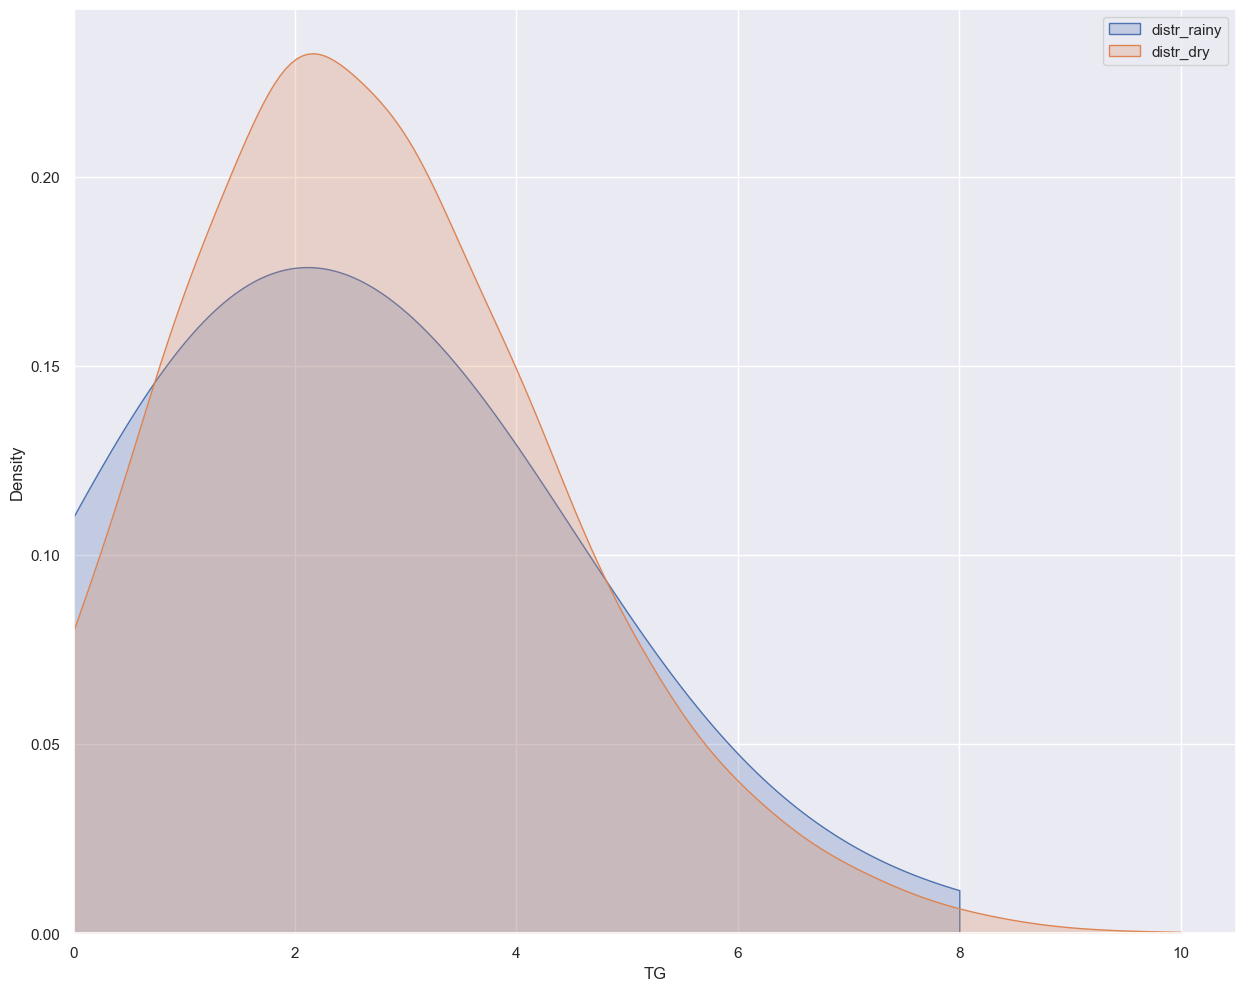

In [37]:
f, ax = plt.subplots(1, 1, figsize=(15, 12))  # Adjusted figsize for better visibility

sns.kdeplot(data=weather.query("precip > 10"), x='TG', cut=0, bw_adjust=2, ax=ax, fill=True, label='distr_rainy')
sns.kdeplot(data=weather.query("~conditions.str.contains('Rain')"), x='TG', cut=0, bw_adjust=2, ax=ax, fill=True, label='distr_dry')
ax.set_xlim(left=0)
ax.legend()


